In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import os
from os.path import join

from torch import load, numel

from analysis_utils import get_df, inspect_model_by_name, compare_two_models, get_num_weights_biases


In [2]:
import warnings
warnings.filterwarnings('error')
warnings.filterwarnings("ignore", category=DeprecationWarning)

identifier = '*'
df = get_df(identifier)
print('before filtering, there are a total of', len(df), 'models')

before filtering, there are a total of 1441 models


## Filter by Consistent CNR Improvement

In [3]:
consistent_cnr = df.query( \
    'target_anechoic_cyst_5mm_target_1_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_1_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_2_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_2_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_3_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_3_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_4_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_4_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_1_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_1_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_2_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_2_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_3_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_3_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_4_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_4_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_5_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_5_cnr_das & \
     target_in_vivo_target_17_cnr_dnn > target_in_vivo_target_17_cnr_das & \
     target_in_vivo_target_19_cnr_dnn > target_in_vivo_target_19_cnr_das')


In [4]:
print('There are {} models with consistent CNR improvements'.format(len(consistent_cnr)))

There are 195 models with consistent CNR improvements


## Calculate the Log Number of Weights for Consistent Models

In [5]:
def apply_get_num_weights_biases(name):
    path = join('..', 'DNNs', name)
    return get_num_weights_biases(path)['k_4']
    

In [6]:
# consistent_cnr.loc[:, 'log_num_weights'] = consistent_cnr.loc[:, 'name'].apply(get_num_weights_biases)
consistent_cnr.loc[:, 'num_weights'] = consistent_cnr['name'].apply(apply_get_num_weights_biases).values
consistent_cnr.loc[:, 'log_num_weights'] = np.log10(consistent_cnr.loc[:, 'num_weights'])


# Plot Average CNR (Phantoms) as a Function of Log Number of Weights

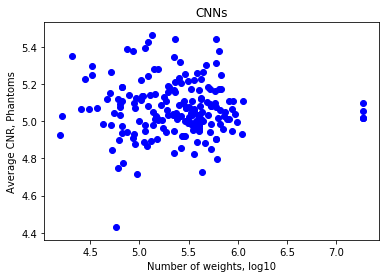

In [7]:
x = consistent_cnr.loc[:, 'log_num_weights'].values
y = consistent_cnr.loc[:, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].values
plt.scatter(x, y, color='blue', label='CNNs')
plt.title('CNNs')
plt.xlabel('Number of weights, log10')
plt.ylabel('Average CNR, Phantoms')
plt.show()


In [8]:
fcs = pd.read_csv('dnn_stats/target_phantom_anechoic_cyst_2p5mm_fcn.txt', index_col=0)

In [9]:
fcs.sort_values(by=['CNR'], ascending=False)

,bf_id,num_weights,CNR
171,1528225522_72,4602000,5.573520
153,1528225522_56,1219400,5.527980
22,1528225522_118,1219400,5.525680
192,1528225522_91,1219400,5.506020
114,1528225522_200,948480,5.486260
0,1528225522_0,948480,5.475540
181,1528225522_81,1219400,5.463940
158,1528225522_60,948480,5.459640
133,1528225522_38,475020,5.445960
145,1528225522_49,4602000,5.435980


In [10]:
# consistent_cnr.loc[:, 'log_num_weights'] = consistent_cnr.loc[:, 'name'].apply(get_num_weights_biases)
fcs.loc[:, 'log_num_weights'] = np.log10(fcs.loc[:, 'num_weights'])


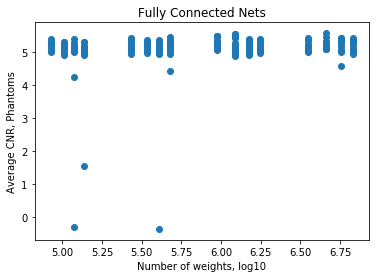

In [11]:
x = fcs.loc[:, 'log_num_weights'].values
y = fcs.loc[:, 'CNR'].values
plt.scatter(x, y)
plt.title('Fully Connected Nets')
plt.xlabel('Number of weights, log10')
plt.ylabel('Average CNR, Phantoms')
plt.show()


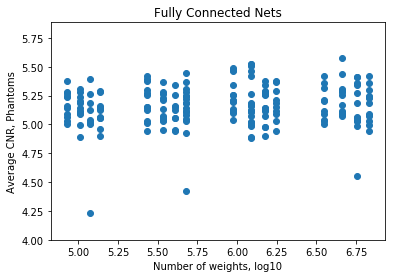

In [12]:
x = fcs.loc[:, 'log_num_weights'].values
y = fcs.loc[:, 'CNR'].values
plt.scatter(x, y)
plt.ylim(bottom=4)
plt.title('Fully Connected Nets')
plt.xlabel('Number of weights, log10')
plt.ylabel('Average CNR, Phantoms')
plt.show()


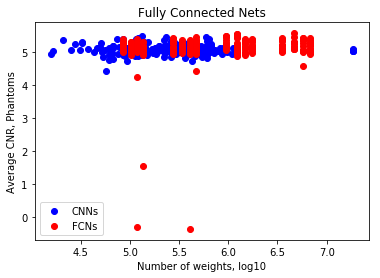

In [13]:
x = consistent_cnr.loc[:, 'log_num_weights'].values
y = consistent_cnr.loc[:, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].values
plt.scatter(x, y, color='blue', label='CNNs')

x = fcs.loc[:, 'log_num_weights'].values
y = fcs.loc[:, 'CNR'].values
plt.scatter(x, y, color='red', label='FCNs')
plt.title('Fully Connected Nets')
plt.xlabel('Number of weights, log10')
plt.ylabel('Average CNR, Phantoms')
plt.legend()
plt.show()



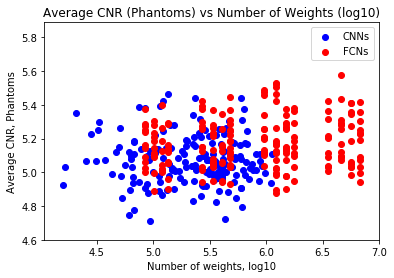

In [14]:
x = consistent_cnr.loc[:, 'log_num_weights'].values
y = consistent_cnr.loc[:, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].values
plt.scatter(x, y, color='blue', label='CNNs')

x = fcs.loc[:, 'log_num_weights'].values
y = fcs.loc[:, 'CNR'].values
plt.scatter(x, y, color='red', label='FCNs')
plt.ylim(bottom=4.6)
plt.xlim(right=7.0)
plt.title('Average CNR (Phantoms) vs Number of Weights (log10)')
plt.xlabel('Number of weights, log10')
plt.ylabel('Average CNR, Phantoms')
plt.legend()
plt.show()



In [15]:
consistent_cnr.loc[:, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].mean()

5.063151794871795

In [16]:
fcs.loc[:, 'CNR'].mean()

5.090739562189055

{'whiskers': [<matplotlib.lines.Line2D object at 0x1a1dee5dd8>, <matplotlib.lines.Line2D object at 0x1a1dee5eb8>, <matplotlib.lines.Line2D object at 0x1a1def8550>, <matplotlib.lines.Line2D object at 0x1a1def8898>], 'caps': [<matplotlib.lines.Line2D object at 0x1a1def04a8>, <matplotlib.lines.Line2D object at 0x1a1def07f0>, <matplotlib.lines.Line2D object at 0x1a1def8be0>, <matplotlib.lines.Line2D object at 0x1a1def8f28>], 'boxes': [<matplotlib.lines.Line2D object at 0x1a1dee59b0>, <matplotlib.lines.Line2D object at 0x1a1def0f28>], 'medians': [<matplotlib.lines.Line2D object at 0x1a1def0b38>, <matplotlib.lines.Line2D object at 0x1a1df6c2b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x1a1def0e80>, <matplotlib.lines.Line2D object at 0x1a1df6c5f8>], 'means': []}


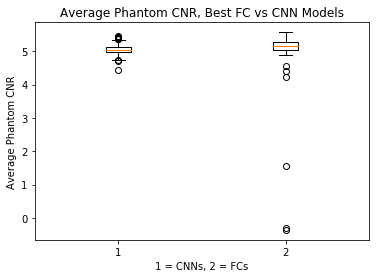

In [25]:
lol = plt.boxplot([consistent_cnr.loc[:, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].values, fcs.loc[:, 'CNR'].values])
plt.title('Average Phantom CNR, Best FC vs CNN Models');
plt.ylabel('Average Phantom CNR');
plt.xlabel('1 = CNNs, 2 = FCs');

print(lol)
